In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:

### 데이터 불러오기
diaDataUrl ="https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/pima-indians-diabetes.csv"
diaDf = pd.read_csv(diaDataUrl)
diaDf

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# sns.countplot(data=diaDf, x="diabetes")

In [14]:
# diaDf.diabetes.value_counts()

In [10]:
# diaDf.describe()

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1. 데이터 타입통합 및 특성 숫자변환

### 2. 특성선정 및 데이터 분리

In [35]:
label = ["diabetes"]
corrDf = diaDf.corr()
# 상관계수 표준 설정
corrStd = 0.25
features = list( corrDf.loc[ corrDf.diabetes >= corrStd].index )
features.remove(label[0])
features

['glucose', 'bmi']

In [43]:
glucoseScaler = MinMaxScaler()
bmiScaler = MinMaxScaler()
diaDf["PREP_GLUCOSE"] = glucoseScaler.fit_transform(diaDf.loc[:,["glucose"]])
diaDf["PREP_BMI"] = bmiScaler.fit_transform(diaDf.loc[:,["bmi"]])

In [47]:
features = ["PREP_GLUCOSE", "PREP_BMI" ]

In [51]:
trainData, testData = train_test_split( diaDf, test_size=0.2, random_state=1 )

In [52]:
trainingDataFeatures = trainData.loc[ :, features]
trainingDataLabel = trainData.loc[ :, label]
testDataFeatures = testData.loc[ :, features]
testDataLabel = testData.loc[ :, label]

In [53]:
print( trainingDataFeatures.shape)
print( trainingDataLabel.shape)
print( testDataFeatures.shape)
print( testDataLabel.shape)

(614, 2)
(614, 1)
(154, 2)
(154, 1)


### 3. 모델 생성

In [65]:
# 입력데이터 구성을 위한 모형 선정
# trainingDataFeatures.iloc[0].shape
inputShape = trainingDataFeatures.reset_index(drop=True).loc[0].shape

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [68]:
unitCnt = 32

In [81]:
model = Sequential()
model.add( Dense ( units= unitCnt, activation="relu", input_shape = inputShape))
model.add( Dense ( units= unitCnt, activation="relu"))
model.add( Dense ( units= unitCnt, activation="relu"))
model.add( Dense ( units= unitCnt, activation="relu"))
model.add( Dropout (rate=0.7))
model.add( Dense ( units= 1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,297 (12.88 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 0 (0.00 B)

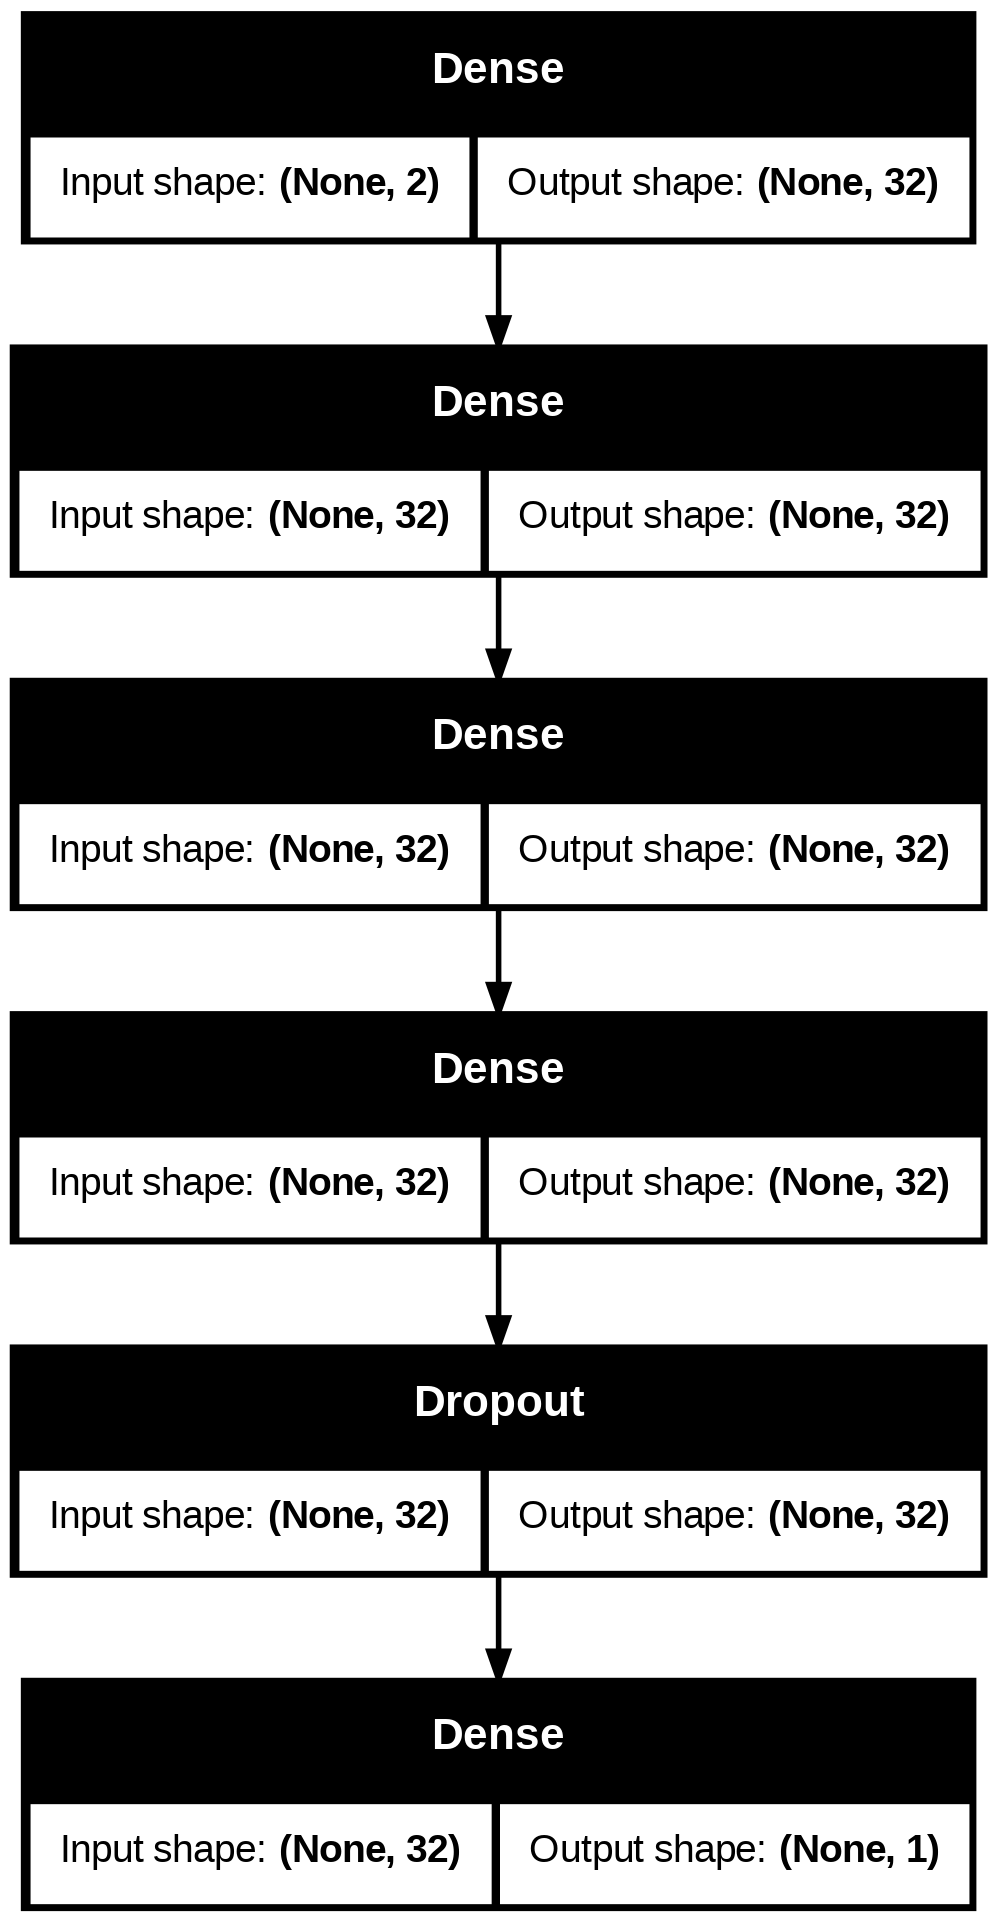

In [83]:
plot_model( model, show_shapes=True )

### 4. 모델 컴파일 (optimizer, loss function 엮어주기)

In [84]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

### 5. 모델 훈련

In [85]:
trainingDataFeatures.shape

(614, 2)

In [86]:
callBackList = [
ModelCheckpoint("dia_best_model.keras", monitor="val_loss", save_best_only=True),
EarlyStopping(monitor="val_loss", patience=400) ]

In [87]:
history = model.fit(x=trainingDataFeatures,
          y=trainingDataLabel,
          epochs=2000,
          batch_size=32,
          callbacks=callBackList,
          validation_split=0.2)

Epoch 1/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5598 - loss: 0.6884 - val_accuracy: 0.6341 - val_loss: 0.6785
Epoch 2/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6446 - loss: 0.6755 - val_accuracy: 0.6341 - val_loss: 0.6710
Epoch 3/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6263 - loss: 0.6721 - val_accuracy: 0.6341 - val_loss: 0.6669
Epoch 4/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6576 - loss: 0.6495 - val_accuracy: 0.6341 - val_loss: 0.6641
Epoch 5/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6738 - loss: 0.6575 - val_accuracy: 0.6341 - val_loss: 0.6619
Epoch 6/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6426 - loss: 0.6481 - val_accuracy: 0.6341 - val_loss: 0.6589
Epoch 7/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6732 - loss: 0.6473 - val_accuracy: 0.6341 - val_loss: 0.6556
Epoch 8/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6715 - loss: 0.6402 - val_accuracy: 0

### 모델 추론

In [89]:
model.evaluate(testDataFeatures, testDataLabel)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.7173 


[0.8372170329093933, 0.7402597665786743]

### 모델 예측

In [104]:
# glucose bmi

In [105]:
diaDf.columns

Index(['pregnancies', 'glucose', 'diastolic', 'trceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes', 'PREP_GLUCOSE', 'PREP_BMI'],
      dtype='object')

<Axes: xlabel='bmi', ylabel='Count'>

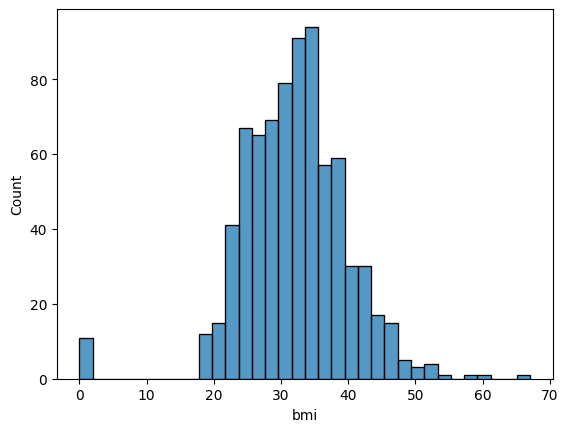

In [109]:
sns.histplot( data=diaDf, x="bmi" )

In [127]:
inputGluse = 100
inputBmi = 30

In [129]:
inputGluse = glucoseScaler.transform( [[inputGluse]])[0][0]
inputBmi = bmiScaler.transform( [[inputBmi]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [130]:
testDf = pd.DataFrame([[inputGluse,inputBmi]])

In [131]:
testDf

,0,1
0,0.502513,0.447094


In [134]:
predictValueForDisplay = model.predict(testDf)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [135]:
model.save("diabetesModel_last.keras")

In [136]:
modelDict = {}

In [137]:
# modelDict["features"] = ...